# Data Preprocessing

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Load the dataset
file_path = 'Microsoft_Stock.csv'
data = pd.read_csv(file_path)


In [15]:
data.head()

,Date,Open,High,Low,Close,Volume,7-day_MA,30-day_MA,Daily_Return,Target
29,2015-05-13 16:00:00,48.19,48.32,47.57,47.63,34184613,47.240000,44.679333,0.005913,1
30,2015-05-14 16:00:00,48.03,48.82,48.03,48.72,32980892,47.400000,44.946000,0.022885,1
31,2015-05-15 16:00:00,48.87,48.91,48.05,48.30,28642694,47.688571,45.213000,-0.008621,0
32,2015-05-18 16:00:00,47.98,48.22,47.61,48.01,24136502,47.875714,45.428333,-0.006004,0
33,2015-05-19 16:00:00,47.62,47.81,47.18,47.58,28574813,47.851429,45.630000,-0.008956,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1482 entries, 29 to 1510
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1482 non-null   datetime64[ns]
 1   Open          1482 non-null   float64       
 2   High          1482 non-null   float64       
 3   Low           1482 non-null   float64       
 4   Close         1482 non-null   float64       
 5   Volume        1482 non-null   int64         
 6   7-day_MA      1482 non-null   float64       
 7   30-day_MA     1482 non-null   float64       
 8   Daily_Return  1482 non-null   float64       
 9   Target        1482 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 127.4 KB


In [18]:
data.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
7-day_MA,0
30-day_MA,0
Daily_Return,0
Target,0


In [12]:
# Data Preprocessing
data.fillna(method='ffill', inplace=True)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.dropna(subset=['Date'], inplace=True)
data.sort_values('Date', inplace=True)

# Feature Engineering
data['7-day_MA'] = data['Close'].rolling(window=7).mean()
data['30-day_MA'] = data['Close'].rolling(window=30).mean()
data['Daily_Return'] = data['Close'].pct_change()
data.dropna(inplace=True)

# Target Variable Creation
data['Target'] = np.where(data['Daily_Return'] > 0, 1, 0)

# Feature Selection
features = ['Open', 'High', 'Low', 'Close', 'Volume', '7-day_MA', '30-day_MA']
X = data[features]
y = data['Target']

In [13]:
# Scaling with StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.90      0.59       132
           1       0.55      0.10      0.16       165

    accuracy                           0.45       297
   macro avg       0.50      0.50      0.38       297
weighted avg       0.50      0.45      0.36       297



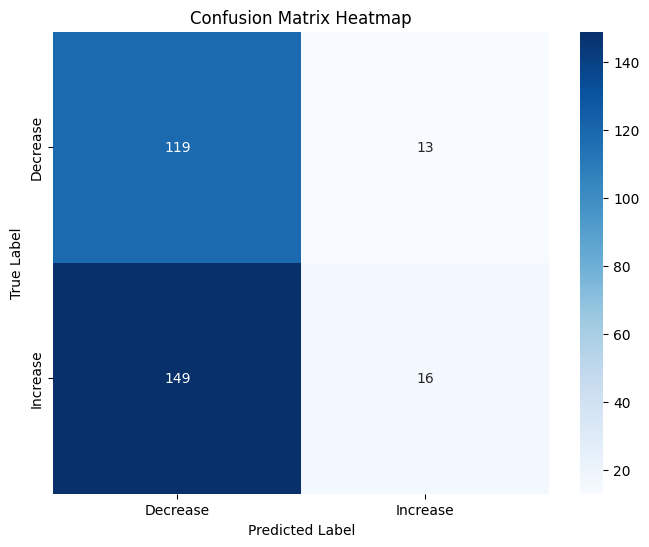

In [14]:
# Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Classification Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)

# Classification Report and Confusion Matrix
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

warnings.filterwarnings("ignore")

# Data Visualisation

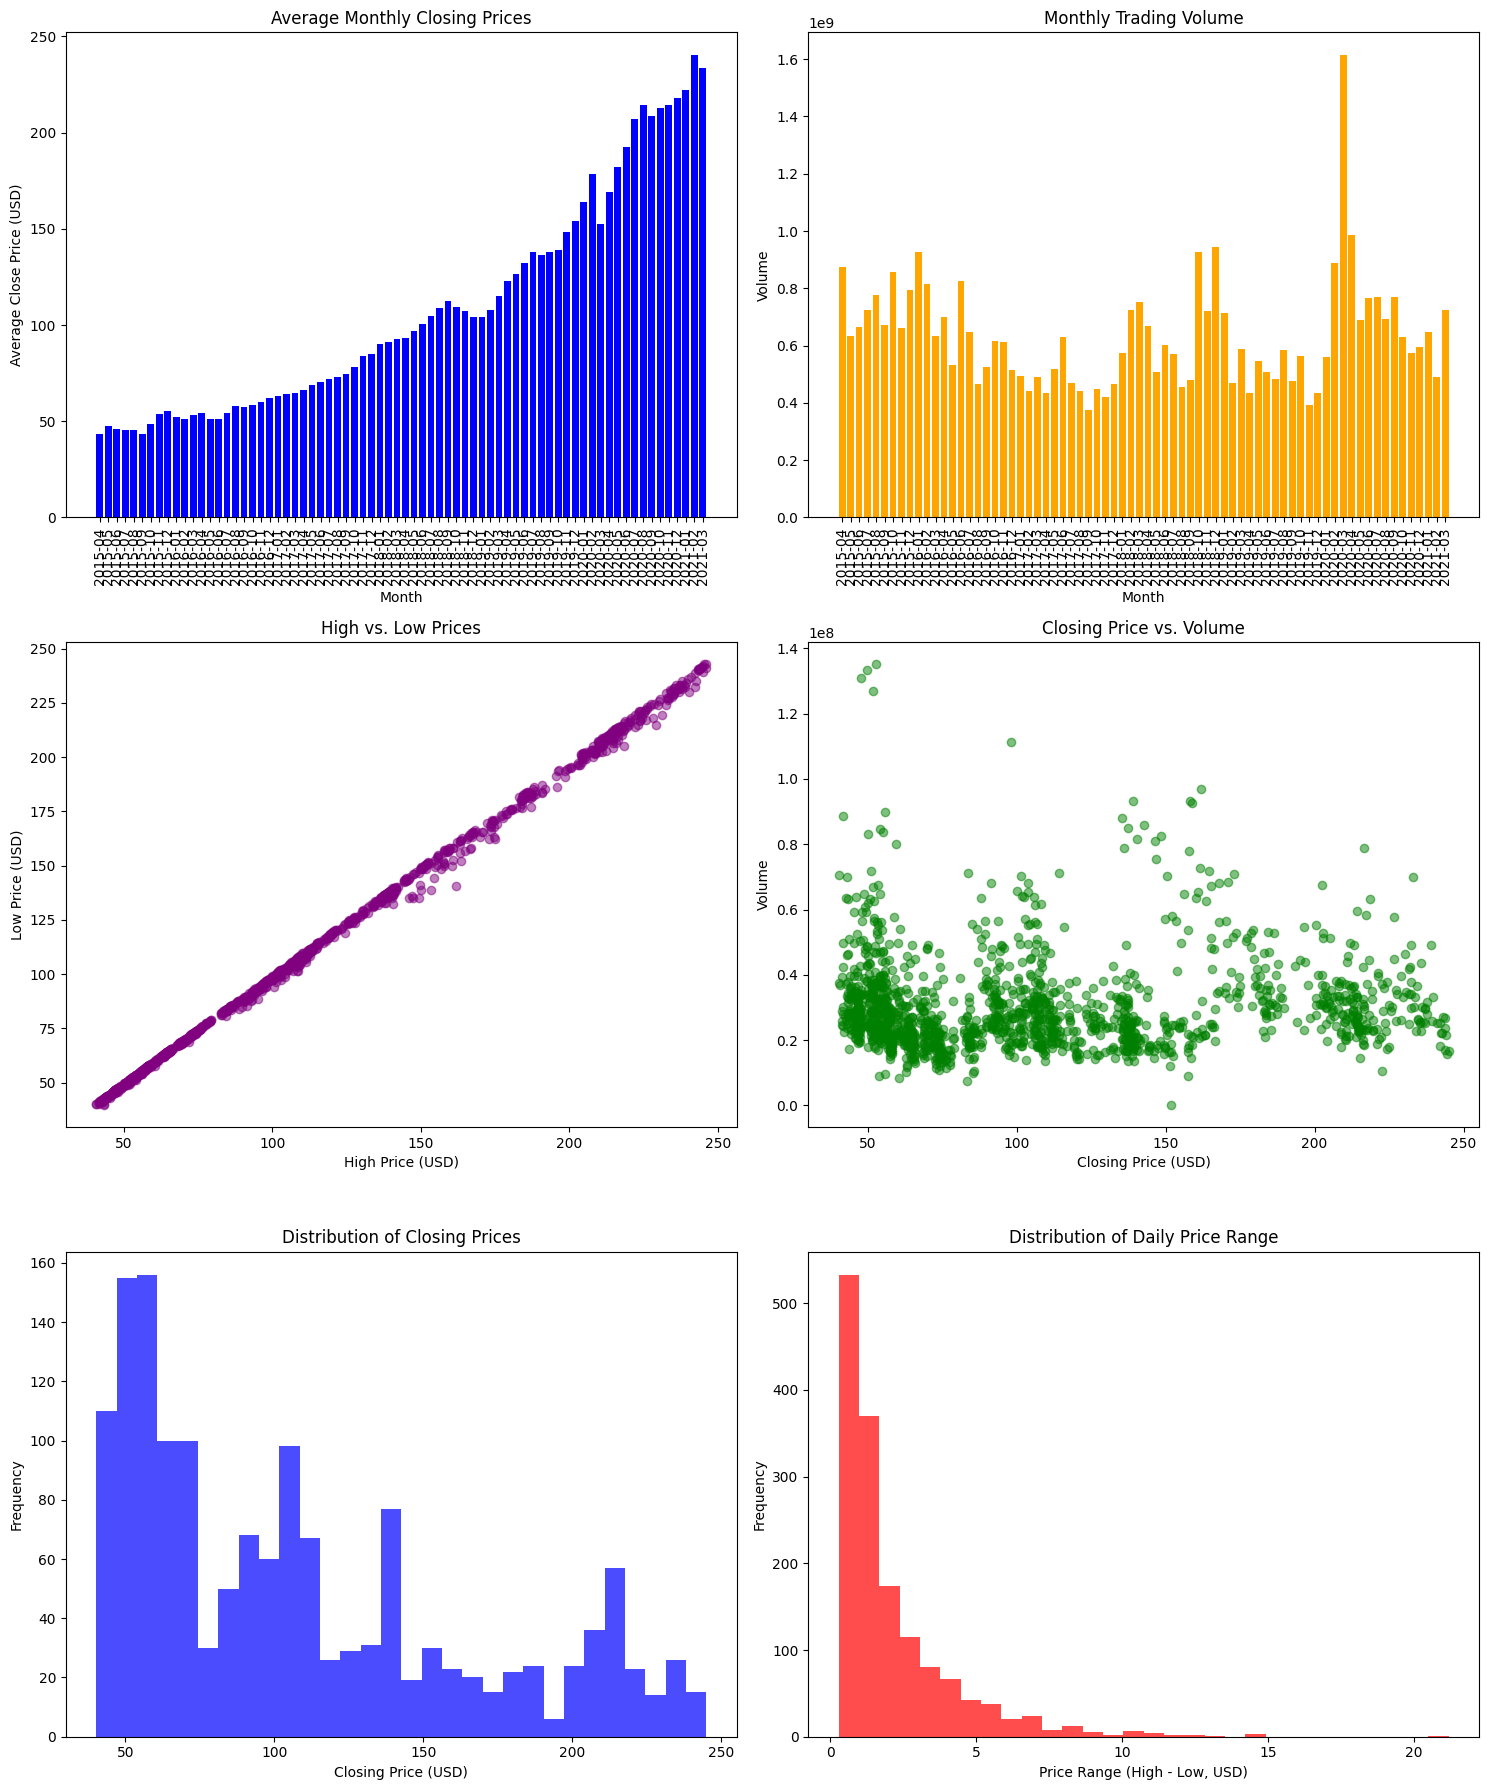

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Microsoft_Stock.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Set up the plotting area
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 1. Bar Plot: Average Monthly Closing Prices
data['Month'] = data['Date'].dt.to_period('M')
monthly_avg_close = data.groupby('Month')['Close'].mean()
axes[0, 0].bar(monthly_avg_close.index.astype(str), monthly_avg_close, color='blue')
axes[0, 0].set_title('Average Monthly Closing Prices')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Average Close Price (USD)')
axes[0, 0].tick_params(axis='x', rotation = 90)

# 2. Bar Plot: Trading Volume by Month
monthly_volume = data.groupby('Month')['Volume'].sum()
axes[0, 1].bar(monthly_volume.index.astype(str), monthly_volume, color='orange')
axes[0, 1].set_title('Monthly Trading Volume')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Volume')
axes[0, 1].tick_params(axis='x', rotation=90)

# 3. Scatter Plot: High vs. Low Prices
axes[1, 0].scatter(data['High'], data['Low'], color='purple', alpha=0.5)
axes[1, 0].set_title('High vs. Low Prices')
axes[1, 0].set_xlabel('High Price (USD)')
axes[1, 0].set_ylabel('Low Price (USD)')

# 4. Scatter Plot: Closing Price vs. Volume
axes[1, 1].scatter(data['Close'], data['Volume'], color='green', alpha=0.5)
axes[1, 1].set_title('Closing Price vs. Volume')
axes[1, 1].set_xlabel('Closing Price (USD)')
axes[1, 1].set_ylabel('Volume')

# 5. Histogram: Distribution of Closing Prices
axes[2, 0].hist(data['Close'], bins=30, color='blue', alpha=0.7)
axes[2, 0].set_title('Distribution of Closing Prices')
axes[2, 0].set_xlabel('Closing Price (USD)')
axes[2, 0].set_ylabel('Frequency')

# 6. Histogram: Distribution of Daily Price Range (High - Low)
data['Price_Range'] = data['High'] - data['Low']
axes[2, 1].hist(data['Price_Range'], bins=30, color='red', alpha=0.7)
axes[2, 1].set_title('Distribution of Daily Price Range')
axes[2, 1].set_xlabel('Price Range (High - Low, USD)')
axes[2, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


# Model Training

Linear Regression - Mean Squared Error: 312.43842350925587
Linear Regression - Mean Absolute Error: 15.148712120513226
Polynomial Regression (Degree 3) - Mean Squared Error: 49.30464629485746
Polynomial Regression (Degree 3) - Mean Absolute Error: 4.815273751908835


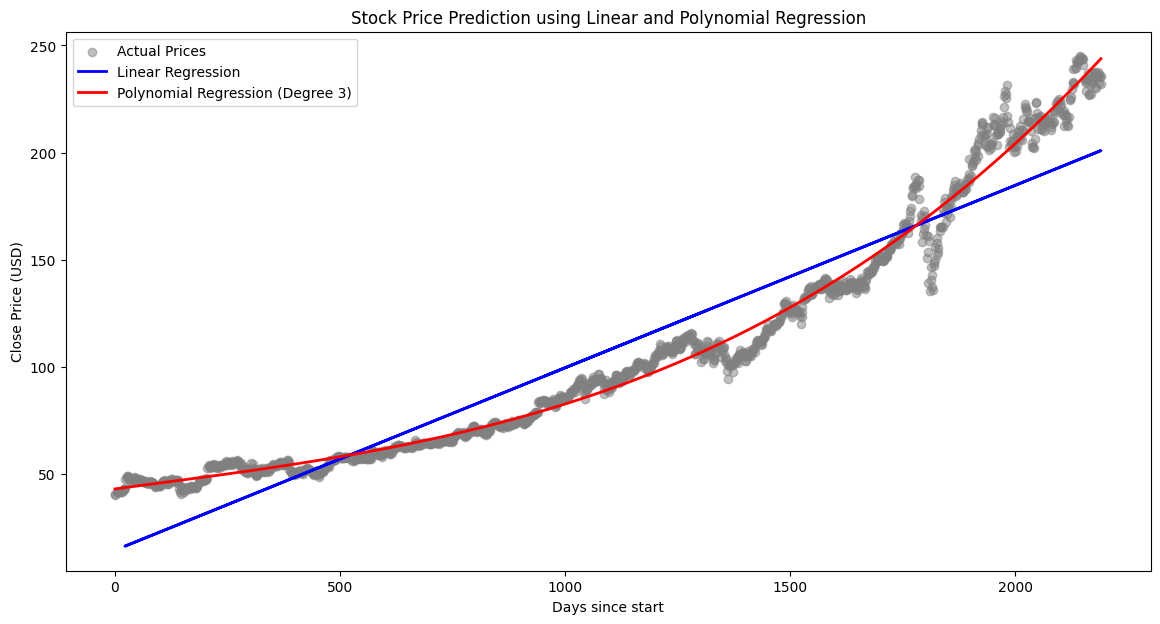

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Load the stock data
data = pd.read_csv('Microsoft_Stock.csv')

# Convert 'Date' column to datetime format and create a numeric feature for days
data['Date'] = pd.to_datetime(data['Date'])
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# Set 'Days' as the independent variable (X) and 'Close' price as the target (y)
X = data[['Days']]
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calculate performance metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# --- Polynomial Regression ---
# Transform the data for Polynomial Regression
poly_degree = 3  # Change this to experiment with different polynomial degrees
poly_features = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate performance metrics for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

# Display results
print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - Mean Absolute Error:", mae_linear)
print("Polynomial Regression (Degree {}) - Mean Squared Error:".format(poly_degree), mse_poly)
print("Polynomial Regression (Degree {}) - Mean Absolute Error:".format(poly_degree), mae_poly)

# --- Plotting the Results ---
plt.figure(figsize=(14, 7))

# Plot original data
plt.scatter(data['Days'], data['Close'], color='gray', alpha=0.5, label='Actual Prices')

# Plot Linear Regression predictions
plt.plot(X_test, y_pred_linear, color='blue', linewidth=2, label='Linear Regression')

# Plot Polynomial Regression predictions
X_range = np.arange(X['Days'].min(), X['Days'].max()).reshape(-1, 1)
y_range_poly = poly_model.predict(poly_features.transform(X_range))
plt.plot(X_range, y_range_poly, color='red', linewidth=2, label='Polynomial Regression (Degree {})'.format(poly_degree))

plt.title('Stock Price Prediction using Linear and Polynomial Regression')
plt.xlabel('Days since start')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


#Model Selection

Linear Regression - Mean Squared Error: 2.979403612777762
Linear Regression - Mean Absolute Error: 1.0536749806771621
Polynomial Regression (Degree 3) - Mean Squared Error: 2.997341077603748
Polynomial Regression (Degree 3) - Mean Absolute Error: 1.0633865240398297
Enter the opening price: 789
Predicted Closing Price using Linear Regression: $788.36
Predicted Closing Price using Polynomial Regression (Degree 3): $570.50


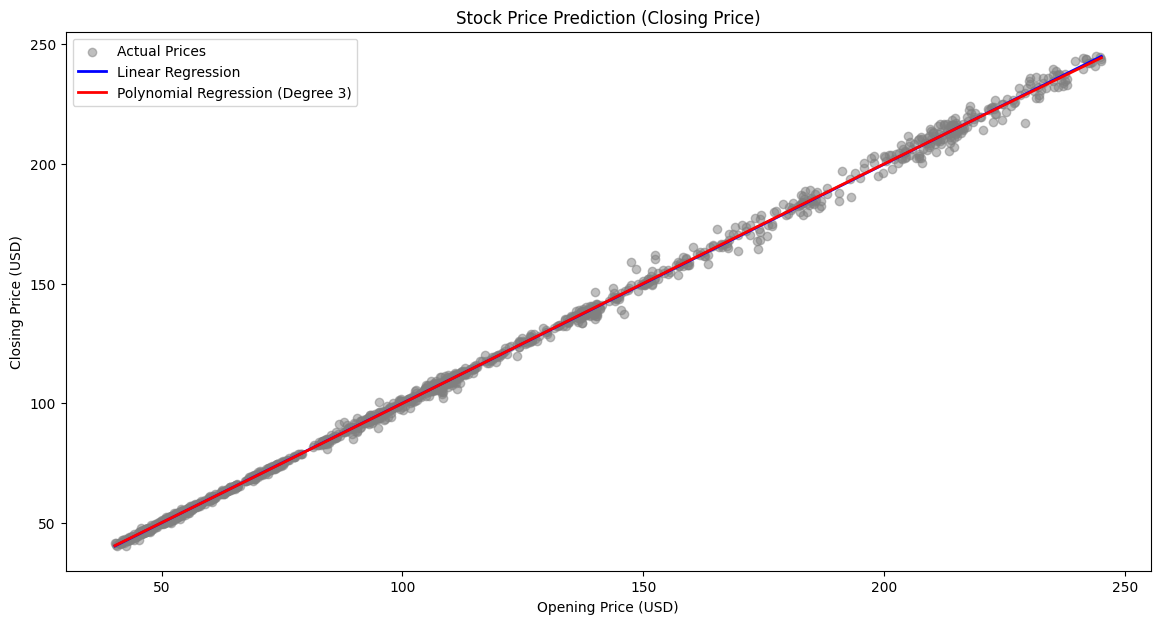

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the stock data
data = pd.read_csv('Microsoft_Stock.csv')

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Use 'Open' as the independent variable (X) and 'Close' as the target (y)
X = data[['Open']]
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Linear Regression ---
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Calculate performance metrics for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

# --- Polynomial Regression ---
# Transform the data for Polynomial Regression
poly_degree = 3  # Change this to experiment with different polynomial degrees
poly_features = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the Polynomial Regression model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Calculate performance metrics for Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

# Display results
print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - Mean Absolute Error:", mae_linear)
print("Polynomial Regression (Degree {}) - Mean Squared Error:".format(poly_degree), mse_poly)
print("Polynomial Regression (Degree {}) - Mean Absolute Error:".format(poly_degree), mae_poly)

# --- User Input Prediction ---
try:
    user_input = float(input("Enter the opening price: "))
except ValueError:
    print("Invalid input. Please enter a numerical value.")
    exit()

# Convert user input to a DataFrame with column name matching the training data
user_input_df = pd.DataFrame([[user_input]], columns=['Open'])

# Linear Regression Prediction
linear_prediction = linear_model.predict(user_input_df)

# Polynomial Regression Prediction
user_input_poly = poly_features.transform(user_input_df)
poly_prediction = poly_model.predict(user_input_poly)

print(f"Predicted Closing Price using Linear Regression: ${linear_prediction[0]:.2f}")
print(f"Predicted Closing Price using Polynomial Regression (Degree {poly_degree}): ${poly_prediction[0]:.2f}")

# --- Visualization ---
plt.figure(figsize=(14, 7))

# Plot original data
plt.scatter(X, y, color='gray', alpha=0.5, label='Actual Prices')

# Plot Linear Regression predictions
X_range = np.linspace(X['Open'].min(), X['Open'].max(), 500).reshape(-1, 1)
X_range_df = pd.DataFrame(X_range, columns=['Open'])  # Create a DataFrame for prediction
y_range_linear = linear_model.predict(X_range_df)
plt.plot(X_range, y_range_linear, color='blue', linewidth=2, label='Linear Regression')

# Plot Polynomial Regression predictions
X_range_poly = poly_features.transform(X_range_df)
y_range_poly = poly_model.predict(X_range_poly)
plt.plot(X_range, y_range_poly, color='red', linewidth=2, label='Polynomial Regression (Degree {})'.format(poly_degree))

plt.title('Stock Price Prediction (Closing Price)')
plt.xlabel('Opening Price (USD)')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
